In [1]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn import tree, ensemble, metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


In [2]:
# read the database
smoking_df = pd.read_csv('../data/smoking.csv')
smoking_df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [3]:
# Dropping ID column as it is not needed
smoking_df.drop('ID',axis=1,inplace=True)

In [4]:
# Check the dataset daya types
smoking_df.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [5]:
# describe data set
smoking_df.describe().round(2)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,76.00,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,9.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,40.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,70.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,76.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,82.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,146.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [6]:
# check unique value
smoking_df.nunique().sort_values()

oral                     1
gender                   2
dental caries            2
tartar                   2
hearing(right)           2
hearing(left)            2
smoking                  2
Urine protein            6
height(cm)              13
age                     14
eyesight(right)         17
eyesight(left)          19
weight(kg)              22
serum creatinine        38
relaxation              95
HDL                    126
systolic               130
hemoglobin             145
AST                    219
ALT                    245
fasting blood sugar    276
Cholesterol            286
LDL                    289
triglyceride           390
Gtp                    488
waist(cm)              566
dtype: int64

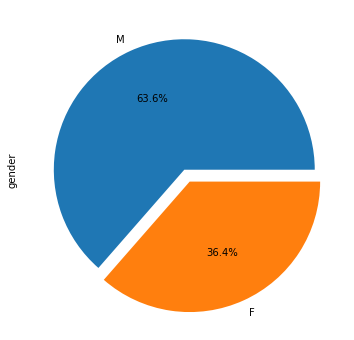

In [7]:
# visualization of gender data
smoking_df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', figsize=(6,6))


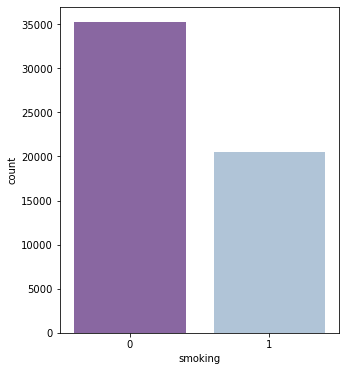

In [8]:
# visualization of gender data
# smoking_df['smoking'].value_counts().plot.bar()
plt.figure(figsize=(5,6))
plt.xlabel("smoking")
sns.countplot(data=smoking_df, x='smoking', palette='BuPu_r')
plt.show()

In [9]:
# total of non smoking and smoking
smoking_df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

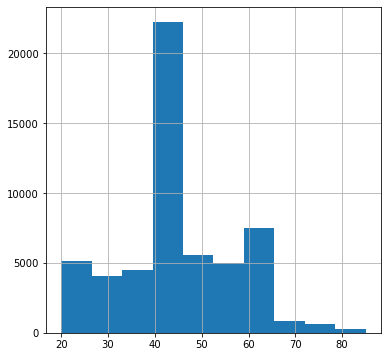

In [10]:
smoking_df['age'].hist(figsize=(6,6))

In [11]:
# check null value in data
smoking_df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [12]:
print(smoking_df.duplicated().sum())

11140


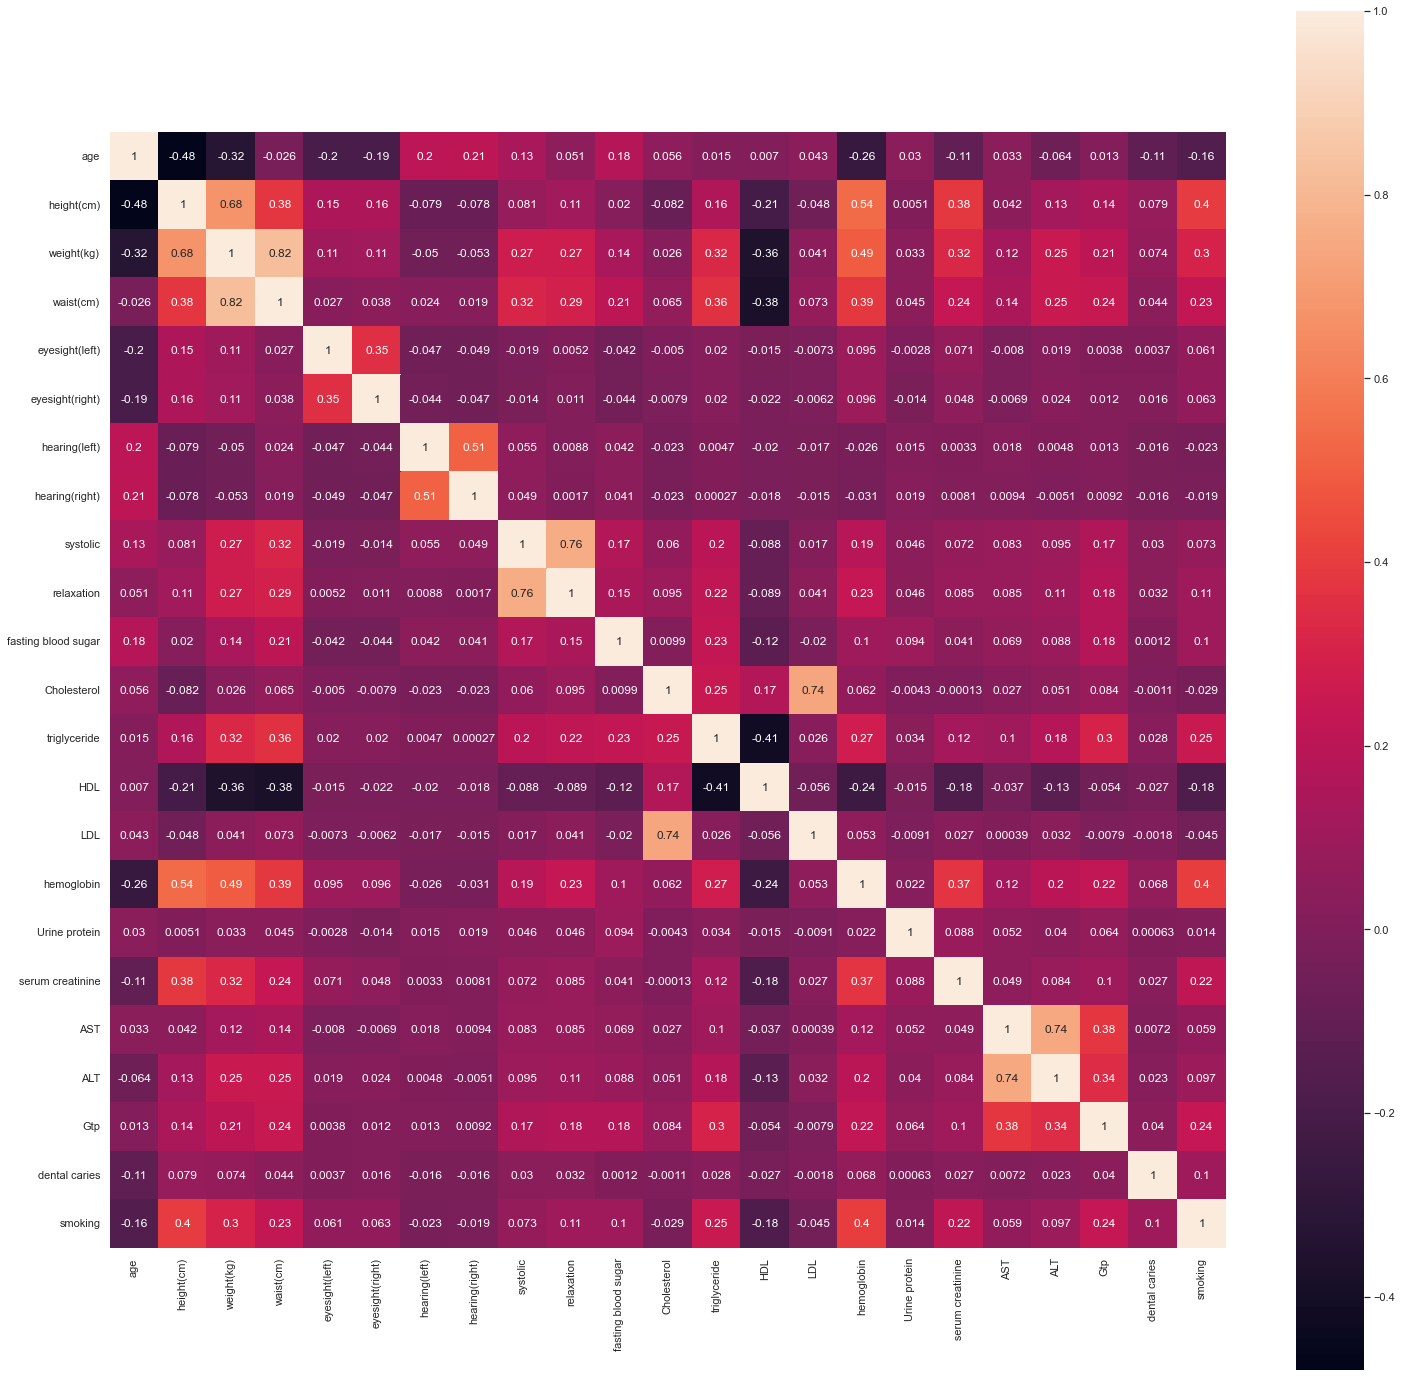

In [13]:
# heatmap of correlation
sns.set(rc={"figure.figsize":(25, 25)})
sns.heatmap(smoking_df.corr(), annot=True, square=True)

In [14]:
smoking_df.shape

(55692, 26)

In [15]:
smoking_df.select_dtypes('object')

,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N
...,...,...,...
55687,F,Y,Y
55688,F,Y,Y
55689,F,Y,N
55690,M,Y,N


In [16]:
# Dropping ID column as it is not needed
# smoking_df.drop('oral',axis=1,inplace=True)

In [17]:
# Generate our categorical variable lists
smoking_cat = smoking_df.dtypes[smoking_df.dtypes == "object"].index.tolist()

In [18]:
# Check the number of unique values in each column
smoking_df[smoking_cat].nunique()

gender    2
oral      1
tartar    2
dtype: int64

In [19]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder()

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(smoking_df[smoking_cat]).toarray())

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(smoking_cat)
# encode_df.head()


In [20]:
# Merge one-hot encoded features and drop the originals
# smoking_df = smoking_df.merge(encode_df,left_index=True, right_index=True)
# smoking_df = smoking_df.drop(smoking_cat,1)
# smoking_df.head()

In [21]:
smoking_df['gender'] = smoking_df['gender'].str.replace('F','0')
smoking_df['gender'] = smoking_df['gender'].str.replace('M','1')

In [22]:
smoking_df['gender'] = pd.to_numeric(smoking_df['gender'])

In [23]:
smoking_df['tartar'] = smoking_df['tartar'].str.replace('N','0')
smoking_df['tartar'] = smoking_df['tartar'].str.replace('Y','1')

In [24]:
smoking_df['tartar'] = pd.to_numeric(smoking_df['tartar'])

In [25]:
smoking_df['oral'] = smoking_df['oral'].str.replace('N','0')
smoking_df['oral'] = smoking_df['oral'].str.replace('Y','1')

In [26]:
smoking_df['oral'] = pd.to_numeric(smoking_df['oral'])

In [27]:
smoking_df.dtypes

gender                   int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                     int64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

In [29]:
# Split our preprocessed data into our features and target arrays
features = ['gender','age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein','serum creatinine','AST','ALT','Gtp','oral','dental caries','tartar']
X = smoking_df[features]
y = smoking_df['smoking']
X.shape, y.shape

((55692, 25), (55692,))

In [30]:
# Split our preprocessed data into our features and target arrays
# y = split_data["smoking"].values
# X = split_data.drop(["smoking"],axis = 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41769, 25)
(13923, 25)
(41769,)
(13923,)


In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# x_test_scaled = scaler.transform(X_test)

In [35]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [36]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [37]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [38]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [39]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7250,1522
Actual 1,1522,3629


Accuracy Score : 0.7813689578395461
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8772
           1       0.70      0.70      0.70      5151

    accuracy                           0.78     13923
   macro avg       0.77      0.77      0.77     13923
weighted avg       0.78      0.78      0.78     13923



In [40]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [41]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [42]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [43]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7250,1522
Actual 1,1522,3629


Accuracy Score : 0.7813689578395461
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8772
           1       0.70      0.70      0.70      5151

    accuracy                           0.78     13923
   macro avg       0.77      0.77      0.77     13923
weighted avg       0.78      0.78      0.78     13923



In [44]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.12443287178262764, 'gender'),
 (0.08312214410711216, 'Gtp'),
 (0.08181057239203313, 'hemoglobin'),
 (0.06923367804778364, 'height(cm)'),
 (0.06439043543849801, 'triglyceride'),
 (0.047468822292205594, 'waist(cm)'),
 (0.0473675437086386, 'LDL'),
 (0.045710506872948, 'Cholesterol'),
 (0.04535046120464526, 'ALT'),
 (0.04534197141651818, 'HDL'),
 (0.0446692162747866, 'fasting blood sugar'),
 (0.04193116050966511, 'systolic'),
 (0.040509535772158586, 'AST'),
 (0.03942998803954316, 'relaxation'),
 (0.03590629898496538, 'weight(kg)'),
 (0.0353933833863128, 'age'),
 (0.03369587566523674, 'serum creatinine'),
 (0.025666646732488377, 'eyesight(left)'),
 (0.025292649121109397, 'eyesight(right)'),
 (0.008494284549895467, 'tartar'),
 (0.007352453309552887, 'dental caries'),
 (0.004283160052420216, 'Urine protein'),
 (0.0015920176148460704, 'hearing(right)'),
 (0.0015543227240089822, 'hearing(left)'),
 (0.0, 'oral')]

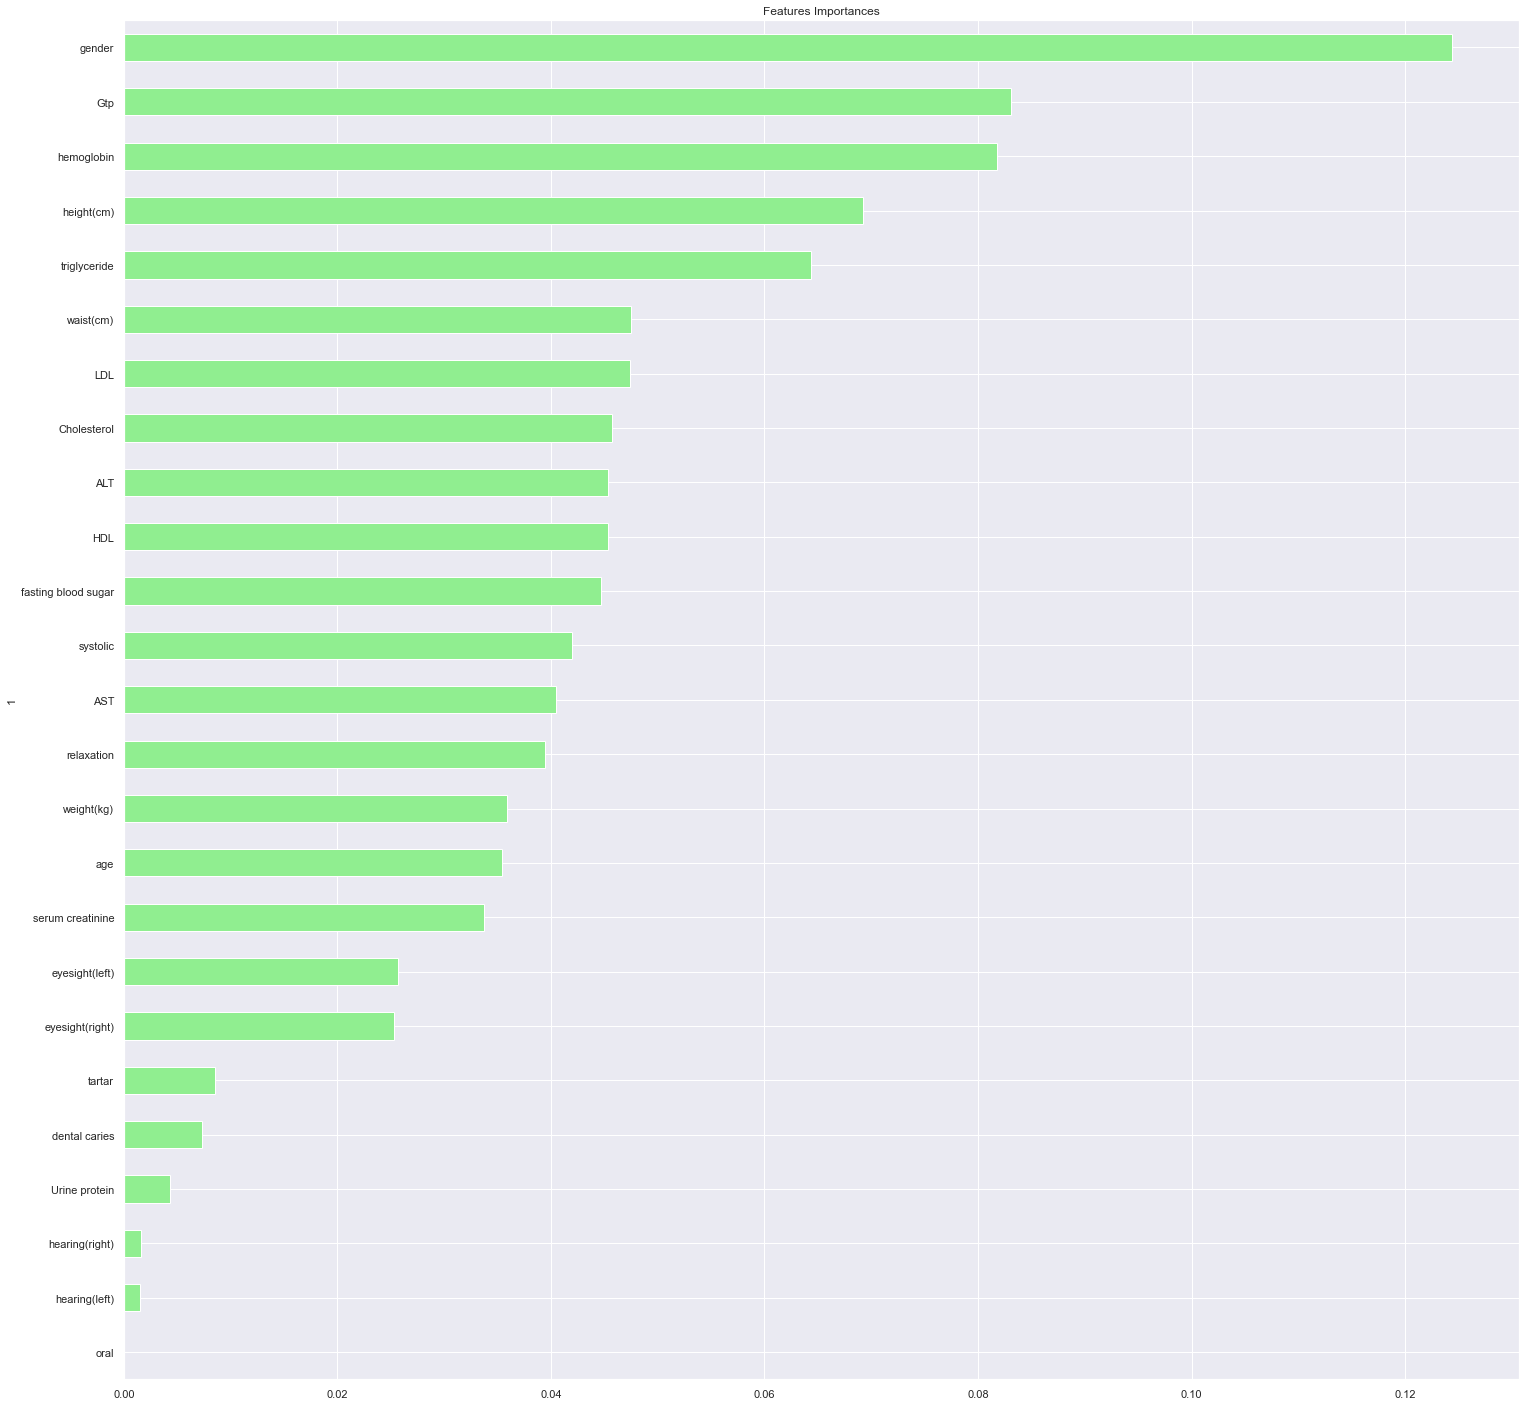

In [45]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [71]:
# Instantiate the model with k = 3 neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)

In [72]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [73]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [84]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[7513, 2618],
       [1259, 2533]], dtype=int64)

In [51]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      8736
           1       0.64      0.64      0.64      5187

    accuracy                           0.73     13923
   macro avg       0.71      0.71      0.71     13923
weighted avg       0.73      0.73      0.73     13923



In [75]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
oversample = RandomOverSampler(sampling_strategy='minority', random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [76]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
X_over.value_counts()
y_over.value_counts()

0    26465
1    26465
Name: smoking, dtype: int64

In [77]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression
classifier_oversample = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier_oversample
# Fit the model using the resampled training data
# YOUR CODE HERE!
classifier_oversample.fit(X_over, y_over)
# Make a prediction using the testing data
# YOUR CODE HERE!
predictions_oversampler = classifier_oversample.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

C:\Users\timn\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Prediction,Actual
0,0,0
1,0,1
2,1,0
3,1,0
4,1,0
5,0,0
6,1,1
7,0,0
8,0,0
9,1,0


In [78]:
accuracy_score(y_test, predictions_oversampler)

0.7188824247647777

In [82]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
from sklearn.metrics import confusion_matrix
confusion_matrix_oversampler = confusion_matrix(y_test, predictions_oversampler)

# Print the confusion matrix for the training data
print(confusion_matrix_oversampler)

[[5589 3183]
 [ 731 4420]]


In [83]:
# Print the classification report for the model
# YOUR CODE HERE!
classification_report_oversampler = classification_report(y_test, predictions_oversampler)

# Print the training classification report
print(classification_report_oversampler)

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      8772
           1       0.58      0.86      0.69      5151

    accuracy                           0.72     13923
   macro avg       0.73      0.75      0.72     13923
weighted avg       0.77      0.72      0.72     13923

